# Toil Recompute Concordance
Author: John Vivian <br>
Date: 2-23-16

Goal: Demonstrate concordance at the dataset level by random sampling genes and patients within the old TCGA RNA-seq pipeline relative to the Toil CGL pipeline.

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm
sns.set_style('darkgrid')

Load in the Xena Python API library

In [4]:
from xena_query import *

## Preparation
Gather a pool of samples and gene names to randomly select from.

In [5]:
tcga_hub = "https://genome-cancer.ucsc.edu:443/proj/public/xena"
tcga_dataset = "public/TCGA/TCGA.PANCAN.sampleMap/HiSeqV2"
toil_hub = "https://toil.xenahubs.net:443/"
toil_dataset = "tcga_RSEM_Hugo_norm_count"

In [6]:
samples = dataset_samples(tcga_hub, tcga_dataset)
print ', '.join(samples[:5])

TCGA-S9-A7J2-01, TCGA-G3-A3CH-11, TCGA-EK-A2RE-01, TCGA-44-6778-01, TCGA-VM-A8C8-01


In [7]:
genes = dataset_field(tcga_hub, tcga_dataset)
print ', '.join(genes[200:210])

ACP5, ACP6, ACPL2, ACPP, ACPT, ACR, ACRBP, ACRC, ACRV1, ACSBG1


In [11]:
genes = dataset_field(toil_hub, toil_dataset)
print ', '.join(genes[200:210])

HTTPError: HTTP Error 503: Service Unavailable: Back-end server is at capacity

## Random Sampling
We'll randomly select 10,000 samples and 10,000 genes. These sample/gene pairs will comprise the set we'll use to construct a matrix to plot concordance.  We can even sample with replacement as it is unlikely the same sample will be paired with the same gene, given there are ~$2.2 \times 10^8$ possible pairs. 

In [15]:
random_samples = np.random.choice(samples, 10000, replace=True)

In [16]:
random_genes = np.random.choice(genes, 10000, replace=True)

In [17]:
pairs = zip(random_samples, random_genes)

Query the Xena browser for the values associated with each sample-gene pairing

In [29]:
pairings = []
for i in tqdm(xrange(10000)):
    pair = '_'.join(pairs[i])
    sample = str(pairs[i][0])
    gene = str(pairs[i][1])
    tcga_value = dataset_probe_values(tcga_hub, tcga_dataset, [sample], [gene])[0][0]
    toil_value = dataset_probe_values(toil_hub, toil_dataset, [sample], [gene])[0][0]
    pairings.append([pair, tcga_value, toil_value])

In [30]:
df = pd.DataFrame(pairings, columns=['Sample_Gene', 'TCGA', 'Toil'])

In [31]:
df_drop = df[df.Toil != 'NaN']

In [32]:
len(df_drop)

8628

In [33]:
df_drop.head()

,Sample_Gene,TCGA,Toil
0,TCGA-24-2289-01_WDR1,12.7051,13.8275
1,TCGA-BR-8286-01_CHIT1,3.8926,5.6043
2,TCGA-BC-A10W-11_PTDSS2,8.7587,9.4874
6,TCGA-EE-A29Q-06_BSG,14.5137,15.3946
7,TCGA-3T-AA9L-01_TRA2B,12.2583,13.0015


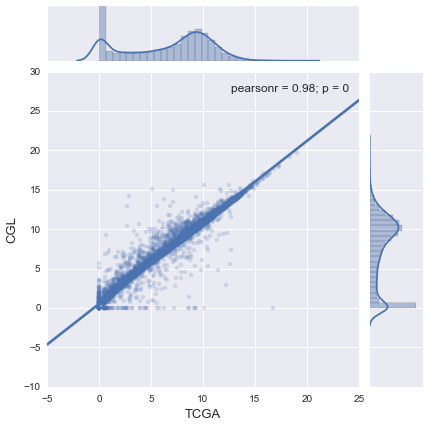

In [39]:
g = sns.jointplot(x='TCGA', y='Toil', data=df_drop, kind='reg', );
g.ax_joint.collections[0].set_alpha(0.2)
plt.ylabel('CGL', fontsize=13)
plt.xlabel('TCGA', fontsize=13)
plt.rc("legend", fontsize=12)
plt.savefig('Random_sampling_concordance.svg', type='svg', dpi=300)

KeyboardInterrupt: 

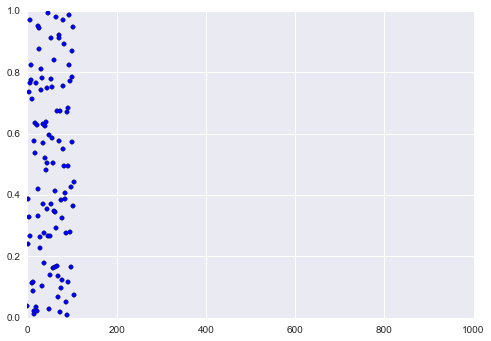

In [41]:
import time
fig=plt.figure()
plt.axis([0,1000,0,1])

i=0
x=list()
y=list()

while i <1000:
    temp_y=np.random.random()
    x.append(i)
    y.append(temp_y)
    plt.scatter(i,temp_y)
    i+=1
    plt.draw()
    time.sleep(0.05)